<a href="https://colab.research.google.com/github/kayserena/machine_learning_datathon_4/blob/main/13_Datathon4_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 4 - Team 13

# Import Libraries

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import TargetEncoder
from category_encoders import OneHotEncoder, TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
import statistics
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import statsmodels.api as sm

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

# Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datathon4.csv to datathon4.csv


In [ ]:
data = pd.read_csv('datathon4.csv')

In [ ]:
print(data.shape)
data.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

## Features by Variable Type

In [ ]:
identifier = ['encounter_id', 'hospital_id', 'patient_id']
demographic = ['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight']
APACHE_cov = ['albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache','map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache']
vitals = ['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min']
labs = ['d1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min']
lab_blood_gas = ['d1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min']
APACHE_Pred = ['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']
APACHE_Comorb = ['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
APACHE_group = ['apache_3j_bodysystem', 'apache_2_bodysystem']
Outcome = ['hospital_death']

# Exploratory Data Analysis - Full Data Set

## Missingness Analysis

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = data.isnull().sum()
print((missing_value_counts/len(data))*100)

encounter_id                      0.000000
patient_id                        0.000000
hospital_id                       0.000000
hospital_death                    0.000000
age                               4.610033
bmi                               3.738837
elective_surgery                  0.000000
ethnicity                         1.521049
gender                            0.027259
height                            1.454538
hospital_admit_source            23.343474
icu_admit_source                  0.122120
icu_id                            0.000000
icu_stay_type                     0.000000
icu_type                          0.000000
pre_icu_los_days                  0.000000
readmission_status                0.000000
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
apache_post_operative             0.000000
arf_apache                        0.779606
bilirubin_a

In [ ]:
# what features have more than 10% missing

for feature in data:
  missing_count = data[feature].isnull().sum()
  missing_proportion = round((missing_count/len(data))*100, 2)
  if missing_proportion > 10:
    print(feature, missing_proportion)
  else:
    pass

hospital_admit_source 23.34
albumin_apache 59.29
bilirubin_apache 63.39
bun_apache 21.0
creatinine_apache 20.56
fio2_apache 77.27
glucose_apache 12.03
hematocrit_apache 21.67
paco2_apache 77.27
paco2_for_ph_apache 77.27
pao2_apache 77.27
ph_apache 77.27
sodium_apache 20.28
urineoutput_apache 53.43
wbc_apache 24.0
d1_diasbp_invasive_max 74.13
d1_diasbp_invasive_min 74.13
d1_mbp_invasive_max 73.9
d1_mbp_invasive_min 73.9
d1_sysbp_invasive_max 74.1
d1_sysbp_invasive_min 74.1
h1_diasbp_invasive_max 81.7
h1_diasbp_invasive_min 81.7
h1_mbp_invasive_max 81.61
h1_mbp_invasive_min 81.61
h1_sysbp_invasive_max 81.68
h1_sysbp_invasive_min 81.68
h1_temp_max 23.7
h1_temp_min 23.7
d1_albumin_max 53.53
d1_albumin_min 53.53
d1_bilirubin_max 58.52
d1_bilirubin_min 58.52
d1_bun_max 11.46
d1_bun_min 11.46
d1_calcium_max 14.25
d1_calcium_min 14.25
d1_creatinine_max 11.09
d1_creatinine_min 11.09
d1_hco3_max 16.43
d1_hco3_min 16.43
d1_hemaglobin_max 13.24
d1_hemaglobin_min 13.24
d1_hematocrit_max 12.71
d1_he

In [ ]:
# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (data.isnull().sum(axis=1) > 0).sum() / len(data)
percentage_missing_rows

0.99972741050887

### Missingness by Variable Type

In [ ]:
# Identifiers
missing_value_counts_identifier = data[identifier].isnull().sum()
missing_value_proportion_identifier = (missing_value_counts_identifier/len(data))*100
print(missing_value_proportion_identifier)

encounter_id    0.0
hospital_id     0.0
patient_id      0.0
dtype: float64


In [ ]:
# demographic
missing_value_counts_demographic = data[demographic].isnull().sum()
missing_value_proportion_demographic = (missing_value_counts_demographic/len(data))*100
print(missing_value_proportion_demographic)

age                       4.610033
bmi                       3.738837
elective_surgery          0.000000
ethnicity                 1.521049
gender                    0.027259
height                    1.454538
hospital_admit_source    23.343474
icu_admit_source          0.122120
icu_id                    0.000000
icu_stay_type             0.000000
icu_type                  0.000000
pre_icu_los_days          0.000000
readmission_status        0.000000
weight                    2.965774
dtype: float64


In [ ]:
# APACHE_cov
missing_value_counts_APACHE_cov = data[APACHE_cov].isnull().sum()
missing_value_proportion_APACHE_cov = (missing_value_counts_APACHE_cov/len(data))*100
print(missing_value_proportion_APACHE_cov)

albumin_apache           59.292576
apache_2_diagnosis        1.812175
apache_3j_diagnosis       1.200484
apache_post_operative     0.000000
arf_apache                0.779606
bilirubin_apache         63.386870
bun_apache               21.002475
creatinine_apache        20.556519
fio2_apache              77.271488
gcs_eyes_apache           2.072770
gcs_motor_apache          2.072770
gcs_unable_apache         1.130701
gcs_verbal_apache         2.072770
glucose_apache           12.033190
heart_rate_apache         0.957334
hematocrit_apache        21.674136
intubated_apache          0.779606
map_apache                1.083816
paco2_apache             77.271488
paco2_for_ph_apache      77.271488
pao2_apache              77.271488
ph_apache                77.271488
resprate_apache           1.345502
sodium_apache            20.280658
temp_apache               4.479191
urineoutput_apache       53.425360
ventilated_apache         0.779606
wbc_apache               24.000960
dtype: float64


In [ ]:
# vitals
missing_value_counts_vitals = data[vitals].isnull().sum()
missing_value_proportion_vitals = (missing_value_counts_vitals/len(data))*100
print(missing_value_proportion_vitals)

d1_diasbp_invasive_max       74.126896
d1_diasbp_invasive_min       74.126896
d1_diasbp_max                 0.179909
d1_diasbp_min                 0.179909
d1_diasbp_noninvasive_max     1.133972
d1_diasbp_noninvasive_min     1.133972
d1_heartrate_max              0.158102
d1_heartrate_min              0.158102
d1_mbp_invasive_max          73.901192
d1_mbp_invasive_min          73.901192
d1_mbp_max                    0.239879
d1_mbp_min                    0.239879
d1_mbp_noninvasive_max        1.612639
d1_mbp_noninvasive_min        1.612639
d1_resprate_max               0.419788
d1_resprate_min               0.419788
d1_spo2_max                   0.363089
d1_spo2_min                   0.363089
d1_sysbp_invasive_max        74.099637
d1_sysbp_invasive_min        74.099637
d1_sysbp_max                  0.173367
d1_sysbp_min                  0.173367
d1_sysbp_noninvasive_max      1.119798
d1_sysbp_noninvasive_min      1.119798
d1_temp_max                   2.533992
d1_temp_min              

In [ ]:
# labs
missing_value_counts_labs = data[labs].isnull().sum()
missing_value_proportion_labs = (missing_value_counts_labs/len(data))*100
print(missing_value_proportion_labs)

d1_albumin_max       53.532215
d1_albumin_min       53.532215
d1_bilirubin_max     58.522783
d1_bilirubin_min     58.522783
d1_bun_max           11.464024
d1_bun_min           11.464024
d1_calcium_max       14.249888
d1_calcium_min       14.249888
d1_creatinine_max    11.087850
d1_creatinine_min    11.087850
d1_glucose_max        6.331709
d1_glucose_min        6.331709
d1_hco3_max          16.432785
d1_hco3_min          16.432785
d1_hemaglobin_max    13.244578
d1_hemaglobin_min    13.244578
d1_hematocrit_max    12.707032
d1_hematocrit_min    12.707032
d1_inr_max           63.176431
d1_inr_min           63.176431
d1_lactate_max       74.576123
d1_lactate_min       74.576123
d1_platelets_max     14.658772
d1_platelets_min     14.658772
d1_potassium_max     10.451081
d1_potassium_min     10.451081
d1_sodium_max        11.116199
d1_sodium_min        11.116199
d1_wbc_max           14.364376
d1_wbc_min           14.364376
h1_albumin_max       91.398166
h1_albumin_min       91.398166
h1_bilir

In [ ]:
# lab_blood_gas
missing_value_counts_lab_blood_gas = data[lab_blood_gas].isnull().sum()
missing_value_proportion_lab_blood_gas = (missing_value_counts_lab_blood_gas/len(data))*100
print(missing_value_proportion_lab_blood_gas)

d1_arterial_pco2_max    64.626607
d1_arterial_pco2_min    64.626607
d1_arterial_ph_max      65.555592
d1_arterial_ph_min      65.555592
d1_arterial_po2_max     64.616794
d1_arterial_po2_min     64.616794
d1_pao2fio2ratio_max    71.972349
d1_pao2fio2ratio_min    71.972349
h1_arterial_pco2_max    82.822501
h1_arterial_pco2_min    82.822501
h1_arterial_ph_max      83.329517
h1_arterial_ph_min      83.329517
h1_arterial_po2_max     82.807236
h1_arterial_po2_min     82.807236
h1_pao2fio2ratio_max    87.441257
h1_pao2fio2ratio_min    87.441257
dtype: float64


In [ ]:
#APACHE_Pred
missing_value_counts_APACHE_Pred = data[APACHE_Pred].isnull().sum()
missing_value_proportion_APACHE_Pred  = (missing_value_counts_APACHE_Pred/len(data))*100
print(missing_value_proportion_APACHE_Pred)

apache_4a_hospital_death_prob    8.665075
apache_4a_icu_death_prob         8.665075
dtype: float64


In [ ]:
# APACHE_Comorb
missing_value_counts_APACHE_Comorb = data[APACHE_Comorb].isnull().sum()
missing_value_proportion_APACHE_Comorb = (missing_value_counts_APACHE_Comorb/len(data))*100
print(missing_value_proportion_APACHE_Comorb)

aids                           0.779606
cirrhosis                      0.779606
diabetes_mellitus              0.779606
hepatic_failure                0.779606
immunosuppression              0.779606
leukemia                       0.779606
lymphoma                       0.779606
solid_tumor_with_metastasis    0.779606
dtype: float64


In [ ]:
# APACHE_group
missing_value_counts_APACHE_group = data[APACHE_group].isnull().sum()
missing_value_proportion_APACHE_group = (missing_value_counts_APACHE_group/len(data))*100
print(missing_value_proportion_APACHE_group)

apache_3j_bodysystem    1.812175
apache_2_bodysystem     1.812175
dtype: float64


In [ ]:
# Outcome
data[Outcome].isnull().sum()

hospital_death    0
dtype: int64

## Final Data Set Decision

Due to the missingness or clinical importance we have chosen the following the variables for or model analysis

In [ ]:
# Variables Chosen
fdemographic = ['age','bmi','ethnicity','gender']
fAPACHE_cov = ['apache_post_operative', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache']
fvitals = ['d1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min']
flabs = ['d1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min']
fcomorbidities = ['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
Outcome = ['hospital_death']

fdata = pd.DataFrame(data[Outcome + fdemographic + fAPACHE_cov + fvitals + flabs + fcomorbidities])

# Exploratory Data Analysis with Selected Variables

In [ ]:
fdata.head()

,hospital_death,age,bmi,ethnicity,gender,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,68.0,22.73,Caucasian,M,0,3.0,6.0,0.0,4.0,0.0,0.0,68.0,37.0,119.0,72.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,8.5,7.4,2.51,2.23,168.0,109.0,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,27.42,Caucasian,F,0,1.0,3.0,0.0,1.0,0.0,1.0,95.0,31.0,118.0,72.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,8.6,8.0,0.71,0.56,145.0,128.0,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,25.0,31.95,Caucasian,F,0,3.0,6.0,0.0,5.0,0.0,0.0,88.0,48.0,96.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,37.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,81.0,22.64,Caucasian,F,1,4.0,6.0,0.0,5.0,1.0,1.0,48.0,42.0,116.0,92.0,23.0,7.0,100.0,95.0,158.0,84.0,38.0,34.8,NaN,NaN,NaN,NaN,185.0,88.0,34.0,25.9,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,19.0,NaN,Caucasian,M,0,NaN,NaN,NaN,NaN,0.0,0.0,99.0,57.0,89.0,60.0,18.0,16.0,100.0,96.0,147.0,120.0,37.2,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
fdata.dtypes

hospital_death                   int64
age                            float64
bmi                            float64
ethnicity                       object
gender                          object
apache_post_operative            int64
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_unable_apache              float64
gcs_verbal_apache              float64
intubated_apache               float64
ventilated_apache              float64
d1_diasbp_max                  float64
d1_diasbp_min                  float64
d1_heartrate_max               float64
d1_heartrate_min               float64
d1_resprate_max                float64
d1_resprate_min                float64
d1_spo2_max                    float64
d1_spo2_min                    float64
d1_sysbp_max                   float64
d1_sysbp_min                   float64
d1_temp_max                    float64
d1_temp_min                    float64
d1_calcium_max                 float64
d1_calcium_min           

## Missingness Analysis

In [ ]:
# demographic
missing_value_counts_fdemographic = fdata[fdemographic].isnull().sum()
missing_value_proportion_fdemographic = (missing_value_counts_fdemographic/len(fdata))*100
print(missing_value_proportion_fdemographic)

age          4.610033
bmi          3.738837
ethnicity    1.521049
gender       0.027259
dtype: float64


In [ ]:
# APACHE_cov
missing_value_counts_fAPACHE_cov = fdata[fAPACHE_cov].isnull().sum()
missing_value_proportion_fAPACHE_cov = (missing_value_counts_fAPACHE_cov/len(fdata))*100
print(missing_value_proportion_fAPACHE_cov)

apache_post_operative    0.000000
gcs_eyes_apache          2.072770
gcs_motor_apache         2.072770
gcs_unable_apache        1.130701
gcs_verbal_apache        2.072770
intubated_apache         0.779606
ventilated_apache        0.779606
dtype: float64


In [ ]:
# vitals
missing_value_counts_fvitals = fdata[fvitals].isnull().sum()
missing_value_proportion_fvitals = (missing_value_counts_fvitals/len(fdata))*100
print(missing_value_proportion_fvitals)

d1_diasbp_max       0.179909
d1_diasbp_min       0.179909
d1_heartrate_max    0.158102
d1_heartrate_min    0.158102
d1_resprate_max     0.419788
d1_resprate_min     0.419788
d1_spo2_max         0.363089
d1_spo2_min         0.363089
d1_sysbp_max        0.173367
d1_sysbp_min        0.173367
d1_temp_max         2.533992
d1_temp_min         2.533992
dtype: float64


In [ ]:
# labs
missing_value_counts_flabs = fdata[flabs].isnull().sum()
missing_value_proportion_flabs = (missing_value_counts_flabs/len(fdata))*100
print(missing_value_proportion_flabs)

d1_calcium_max       14.249888
d1_calcium_min       14.249888
d1_creatinine_max    11.087850
d1_creatinine_min    11.087850
d1_glucose_max        6.331709
d1_glucose_min        6.331709
d1_hematocrit_max    12.707032
d1_hematocrit_min    12.707032
d1_platelets_max     14.658772
d1_platelets_min     14.658772
d1_potassium_max     10.451081
d1_potassium_min     10.451081
d1_sodium_max        11.116199
d1_sodium_min        11.116199
d1_wbc_max           14.364376
d1_wbc_min           14.364376
dtype: float64


In [ ]:
# comorbidities
missing_value_counts_fcomorbidities = data[fcomorbidities].isnull().sum()
missing_value_proportion_fcomorbidities = (missing_value_counts_fcomorbidities/len(fdata))*100
print(missing_value_proportion_fcomorbidities)

aids                           0.779606
cirrhosis                      0.779606
diabetes_mellitus              0.779606
hepatic_failure                0.779606
immunosuppression              0.779606
leukemia                       0.779606
lymphoma                       0.779606
solid_tumor_with_metastasis    0.779606
dtype: float64


## Data Visualization

**Demographics**

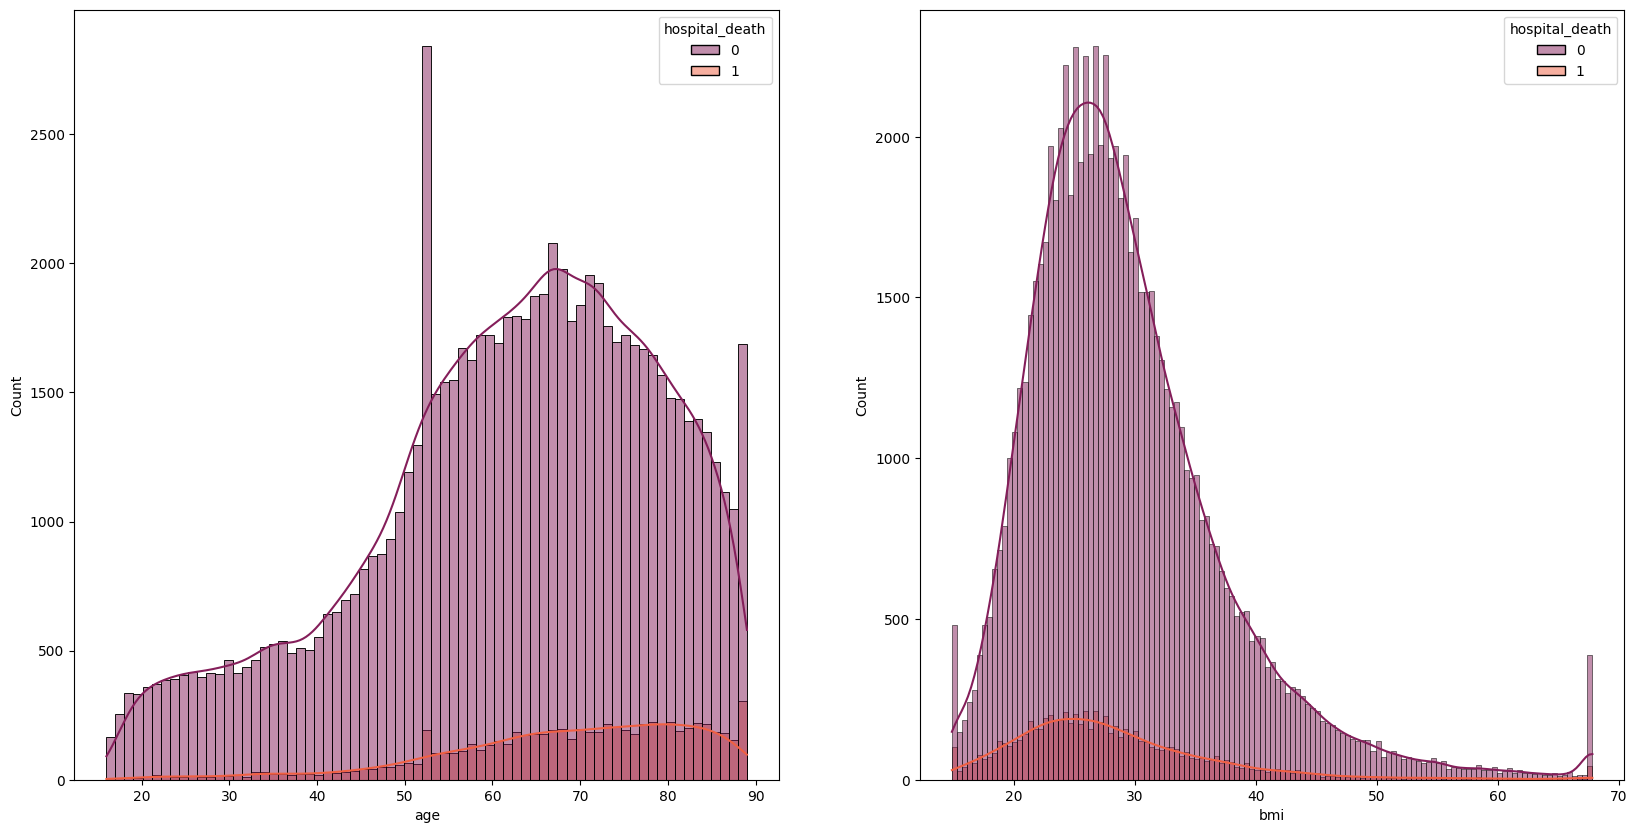

In [ ]:
# demographics - numerical

numerical_demographic = ['age', 'bmi']

# checking the difference in distribution of numerical features in two classes
# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_demographic):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 2
    y = i % 2

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data, x=column, hue='hospital_death', kde=True, palette='rocket', ax=axs[y])

# Display all the subplots
plt.show()

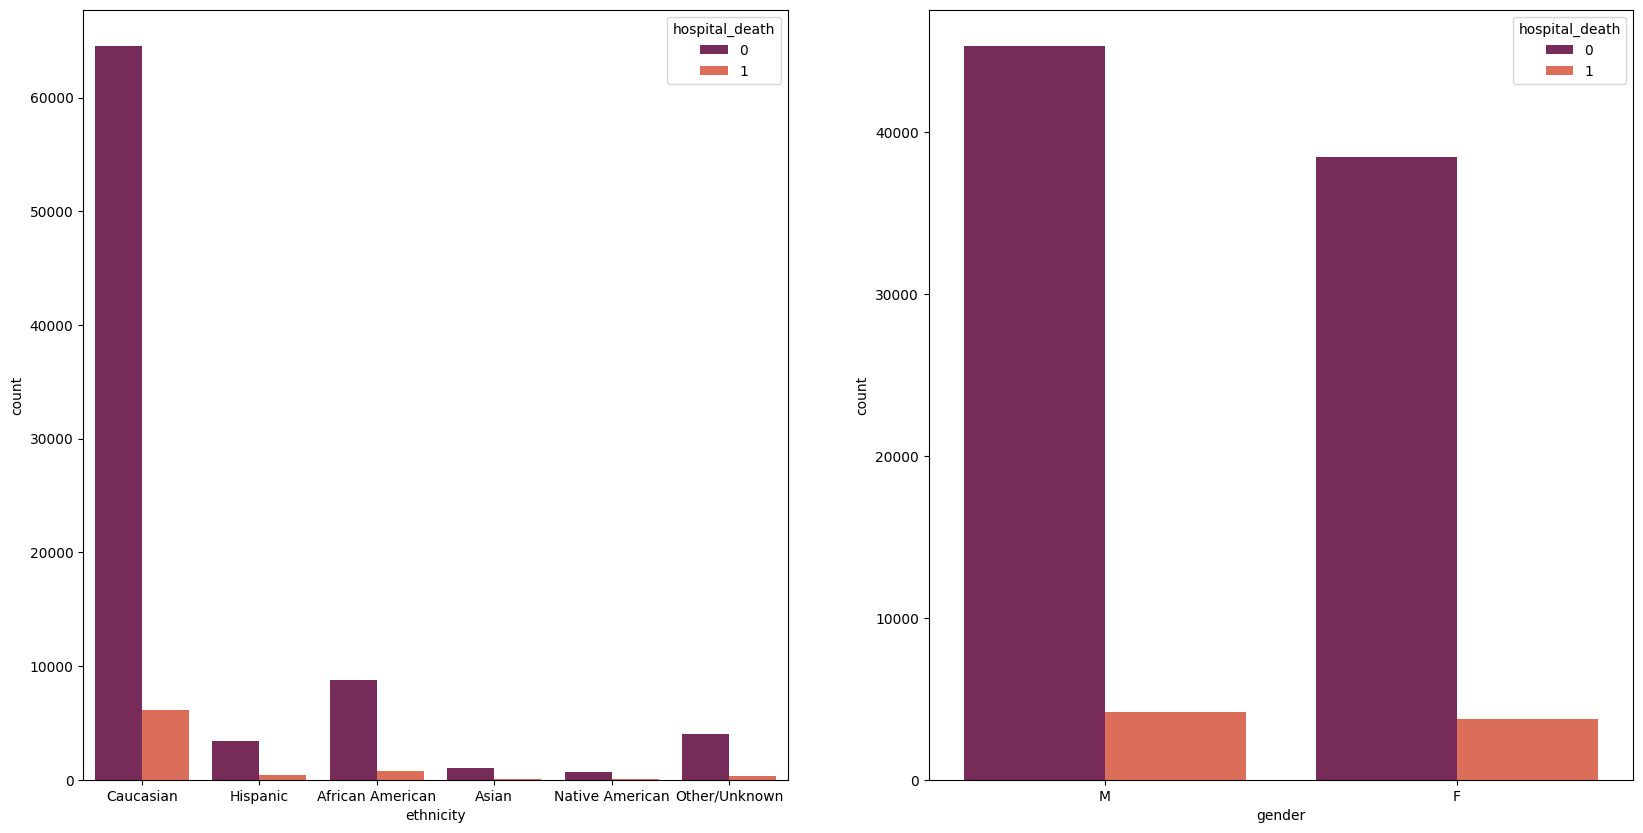

In [ ]:
# demographics - categorical
categorical_demographic = ['ethnicity', 'gender']

# Checking the difference in the distribution of categorical features across two classes
# Initialize a 3x3 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

# Loop through each categorical column to plot its distribution
for i, column in enumerate(categorical_demographic):
    # Determine the subplot's position based on the current index
    x = i // 2
    y = i % 2

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=data, x=column, hue='hospital_death', palette='rocket', ax=axs[y])

# Display all the plots
plt.show()

**Apache Covariates**

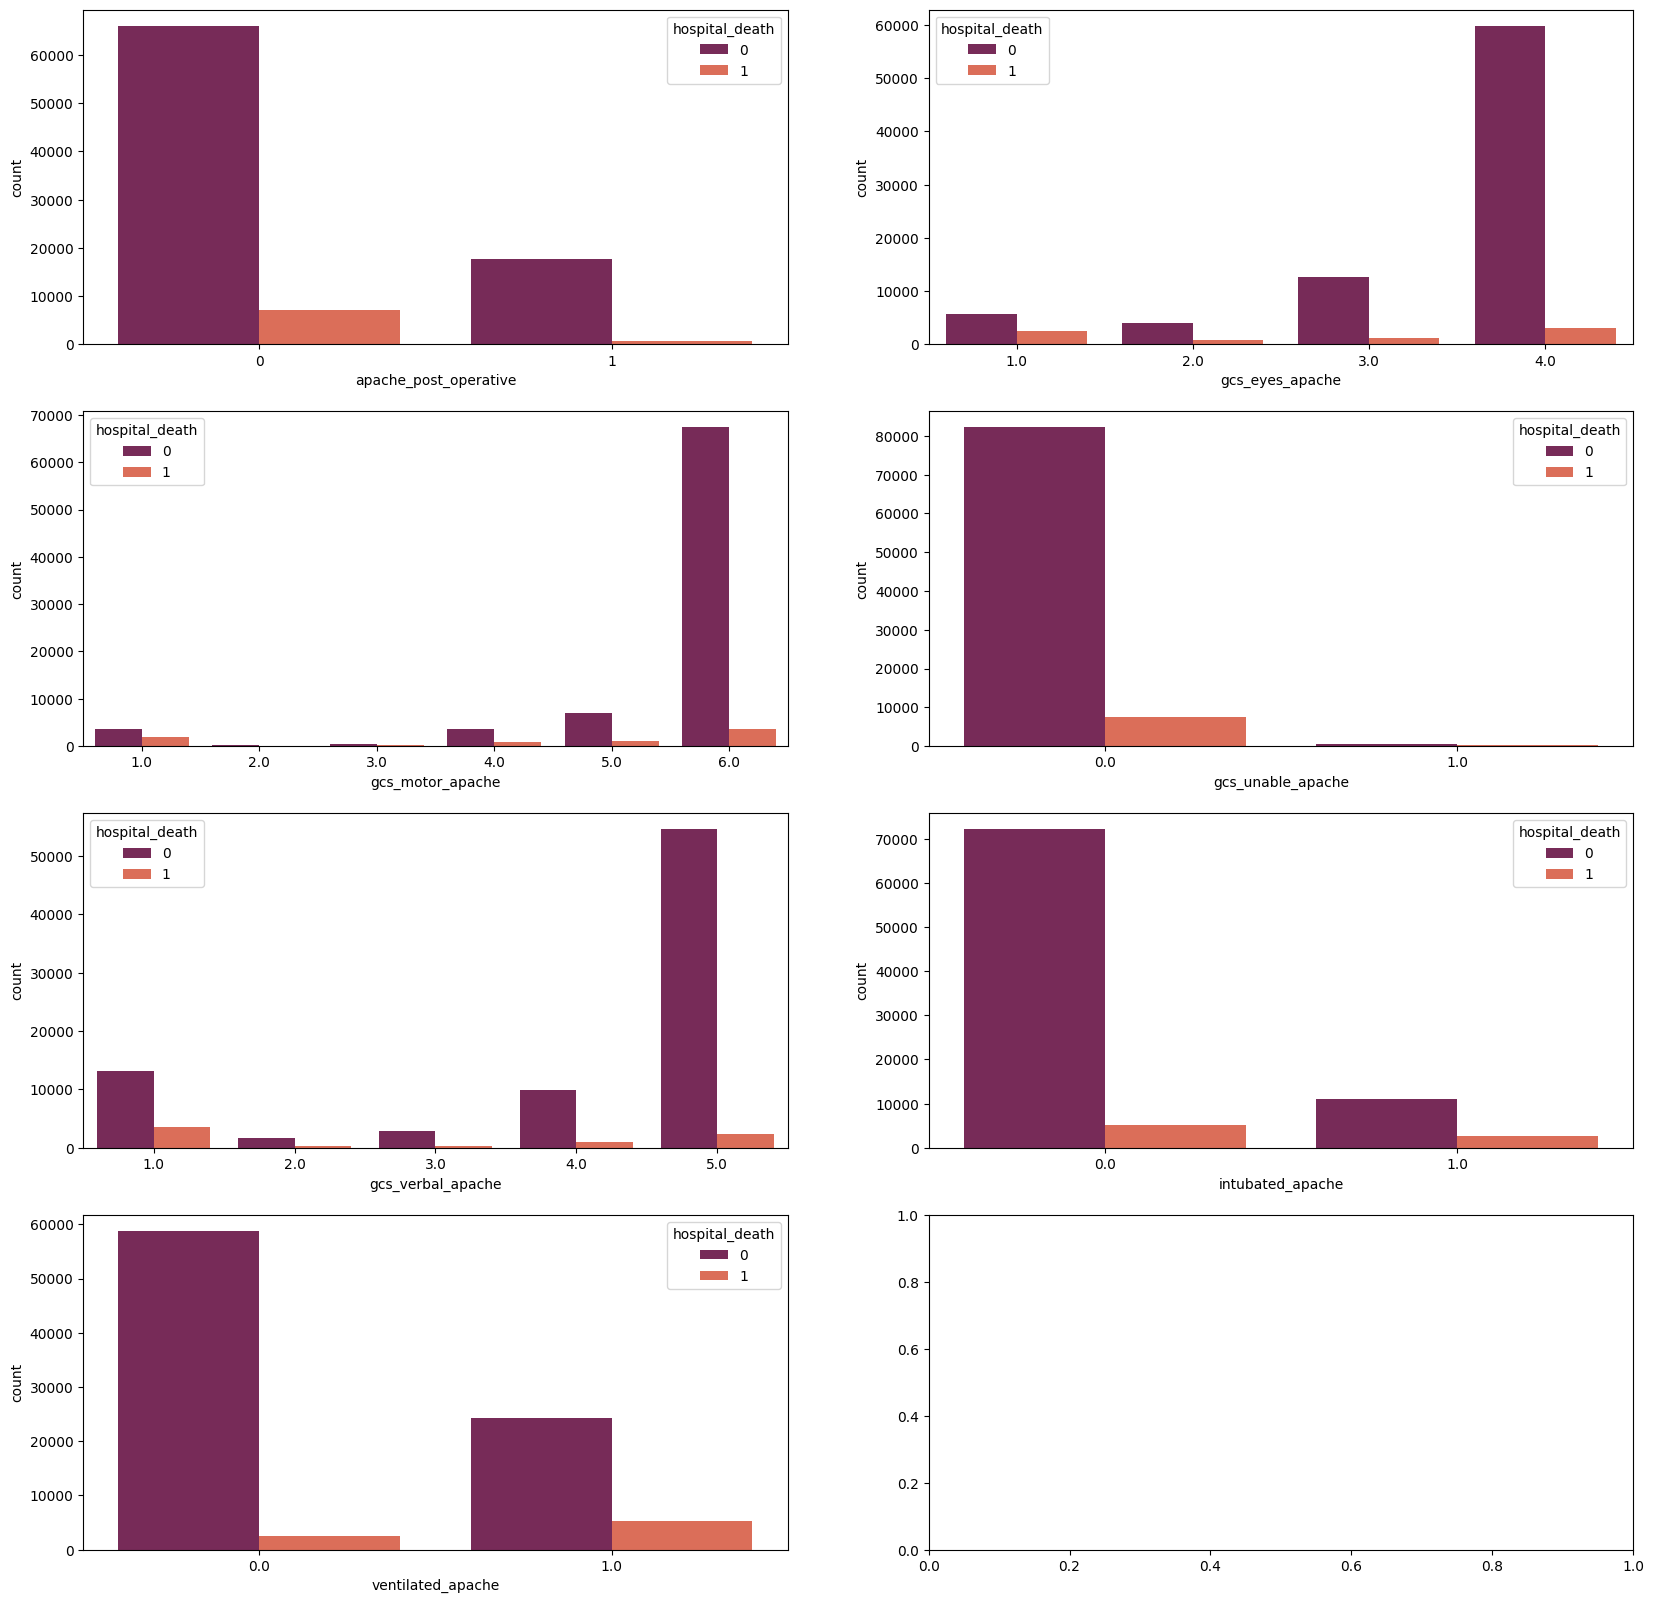

In [ ]:
# Checking the difference in the distribution of categorical features across two classes
# Initialize a 3x3 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))

# Loop through each categorical column to plot its distribution
for i, column in enumerate(fAPACHE_cov):
    # Determine the subplot's position based on the current index
    x = i // 2
    y = i % 2

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=fdata, x=column, hue='hospital_death', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

**Vitals**

<Axes: >

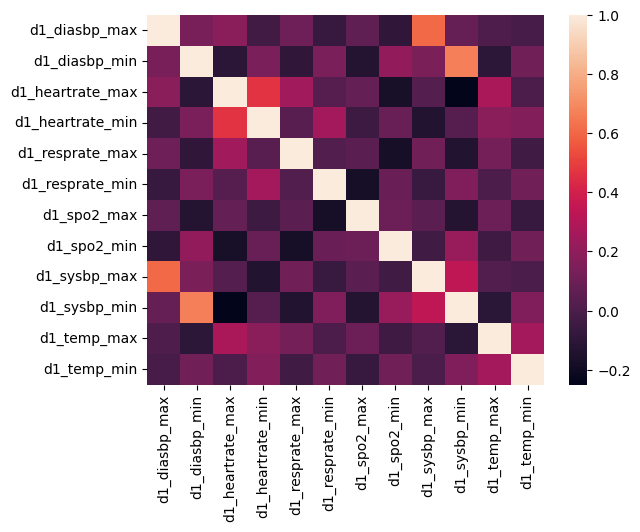

In [ ]:
sns.heatmap(data[fvitals].corr())

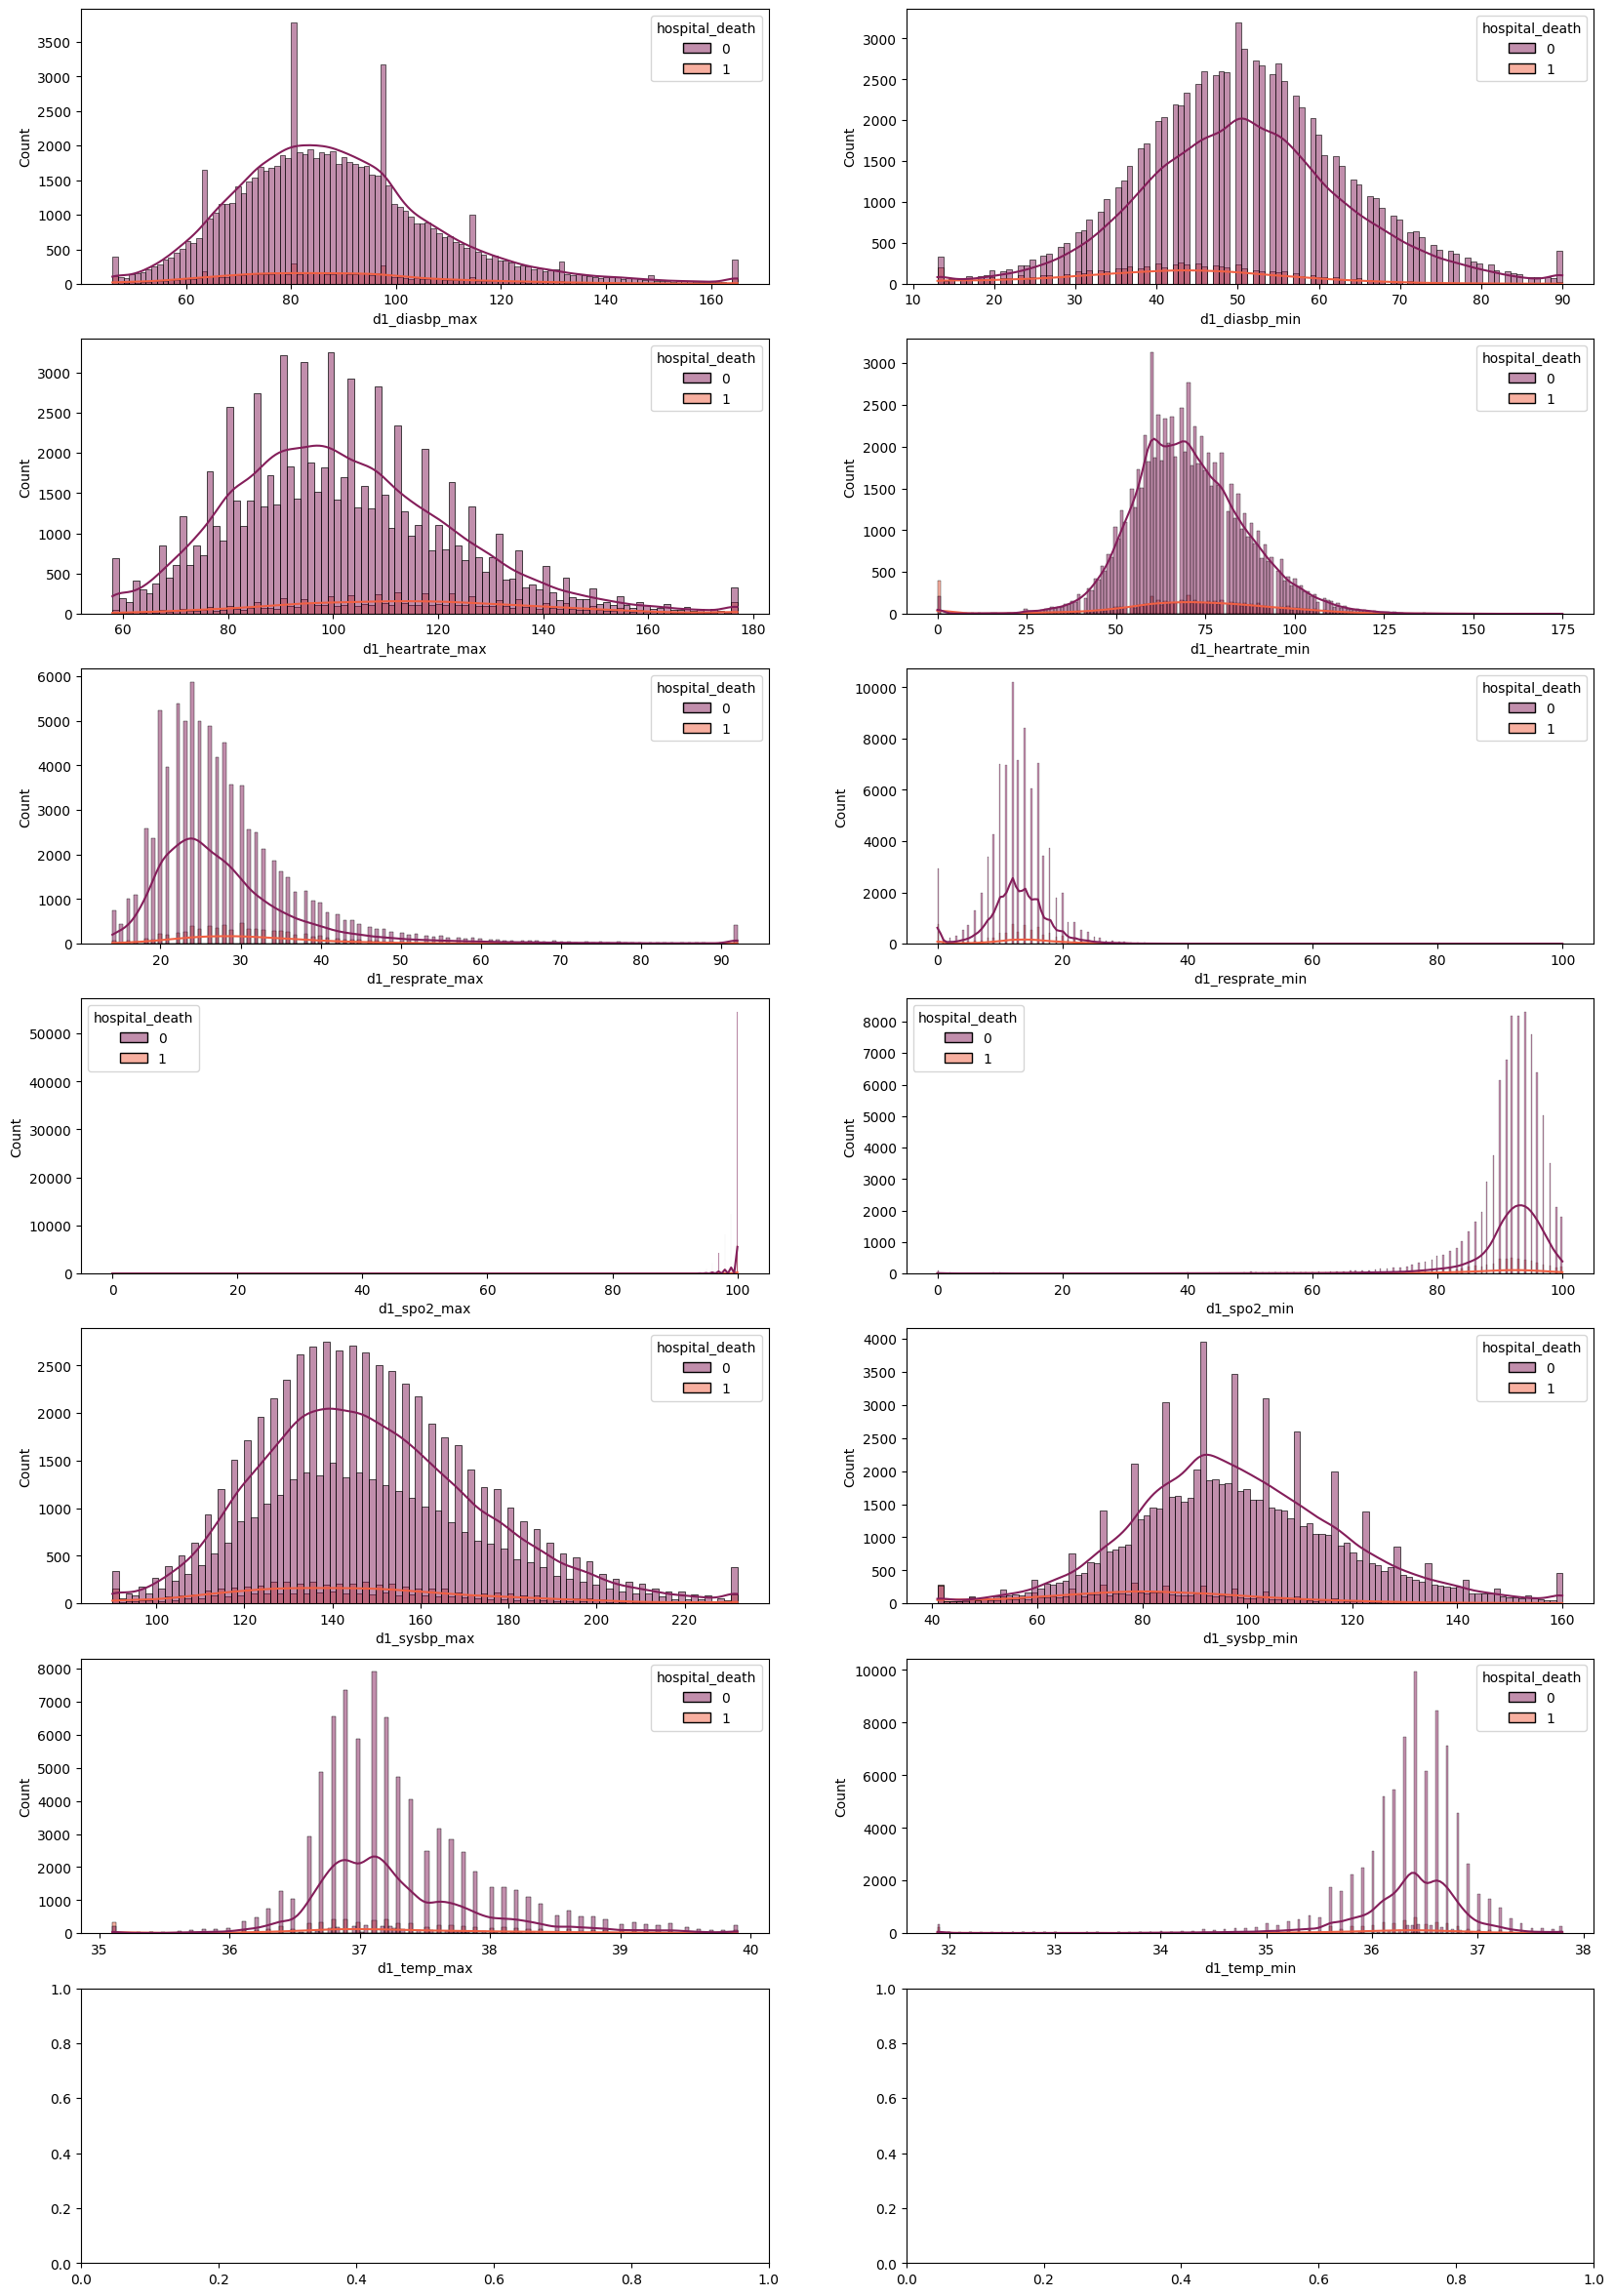

In [ ]:
# checking the difference in distribution of numerical features in two classes
# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(20, 30))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(fvitals):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 2
    y = i % 2

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(fdata, x=column, hue='hospital_death', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

**Labs**

<Axes: >

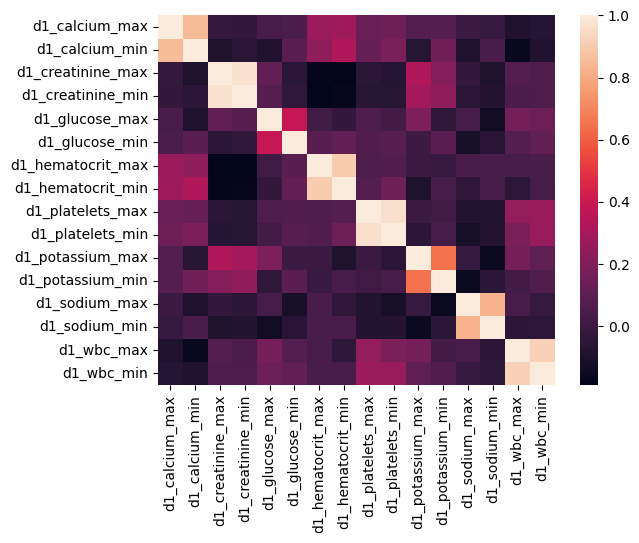

In [ ]:
sns.heatmap(fdata[flabs].corr())

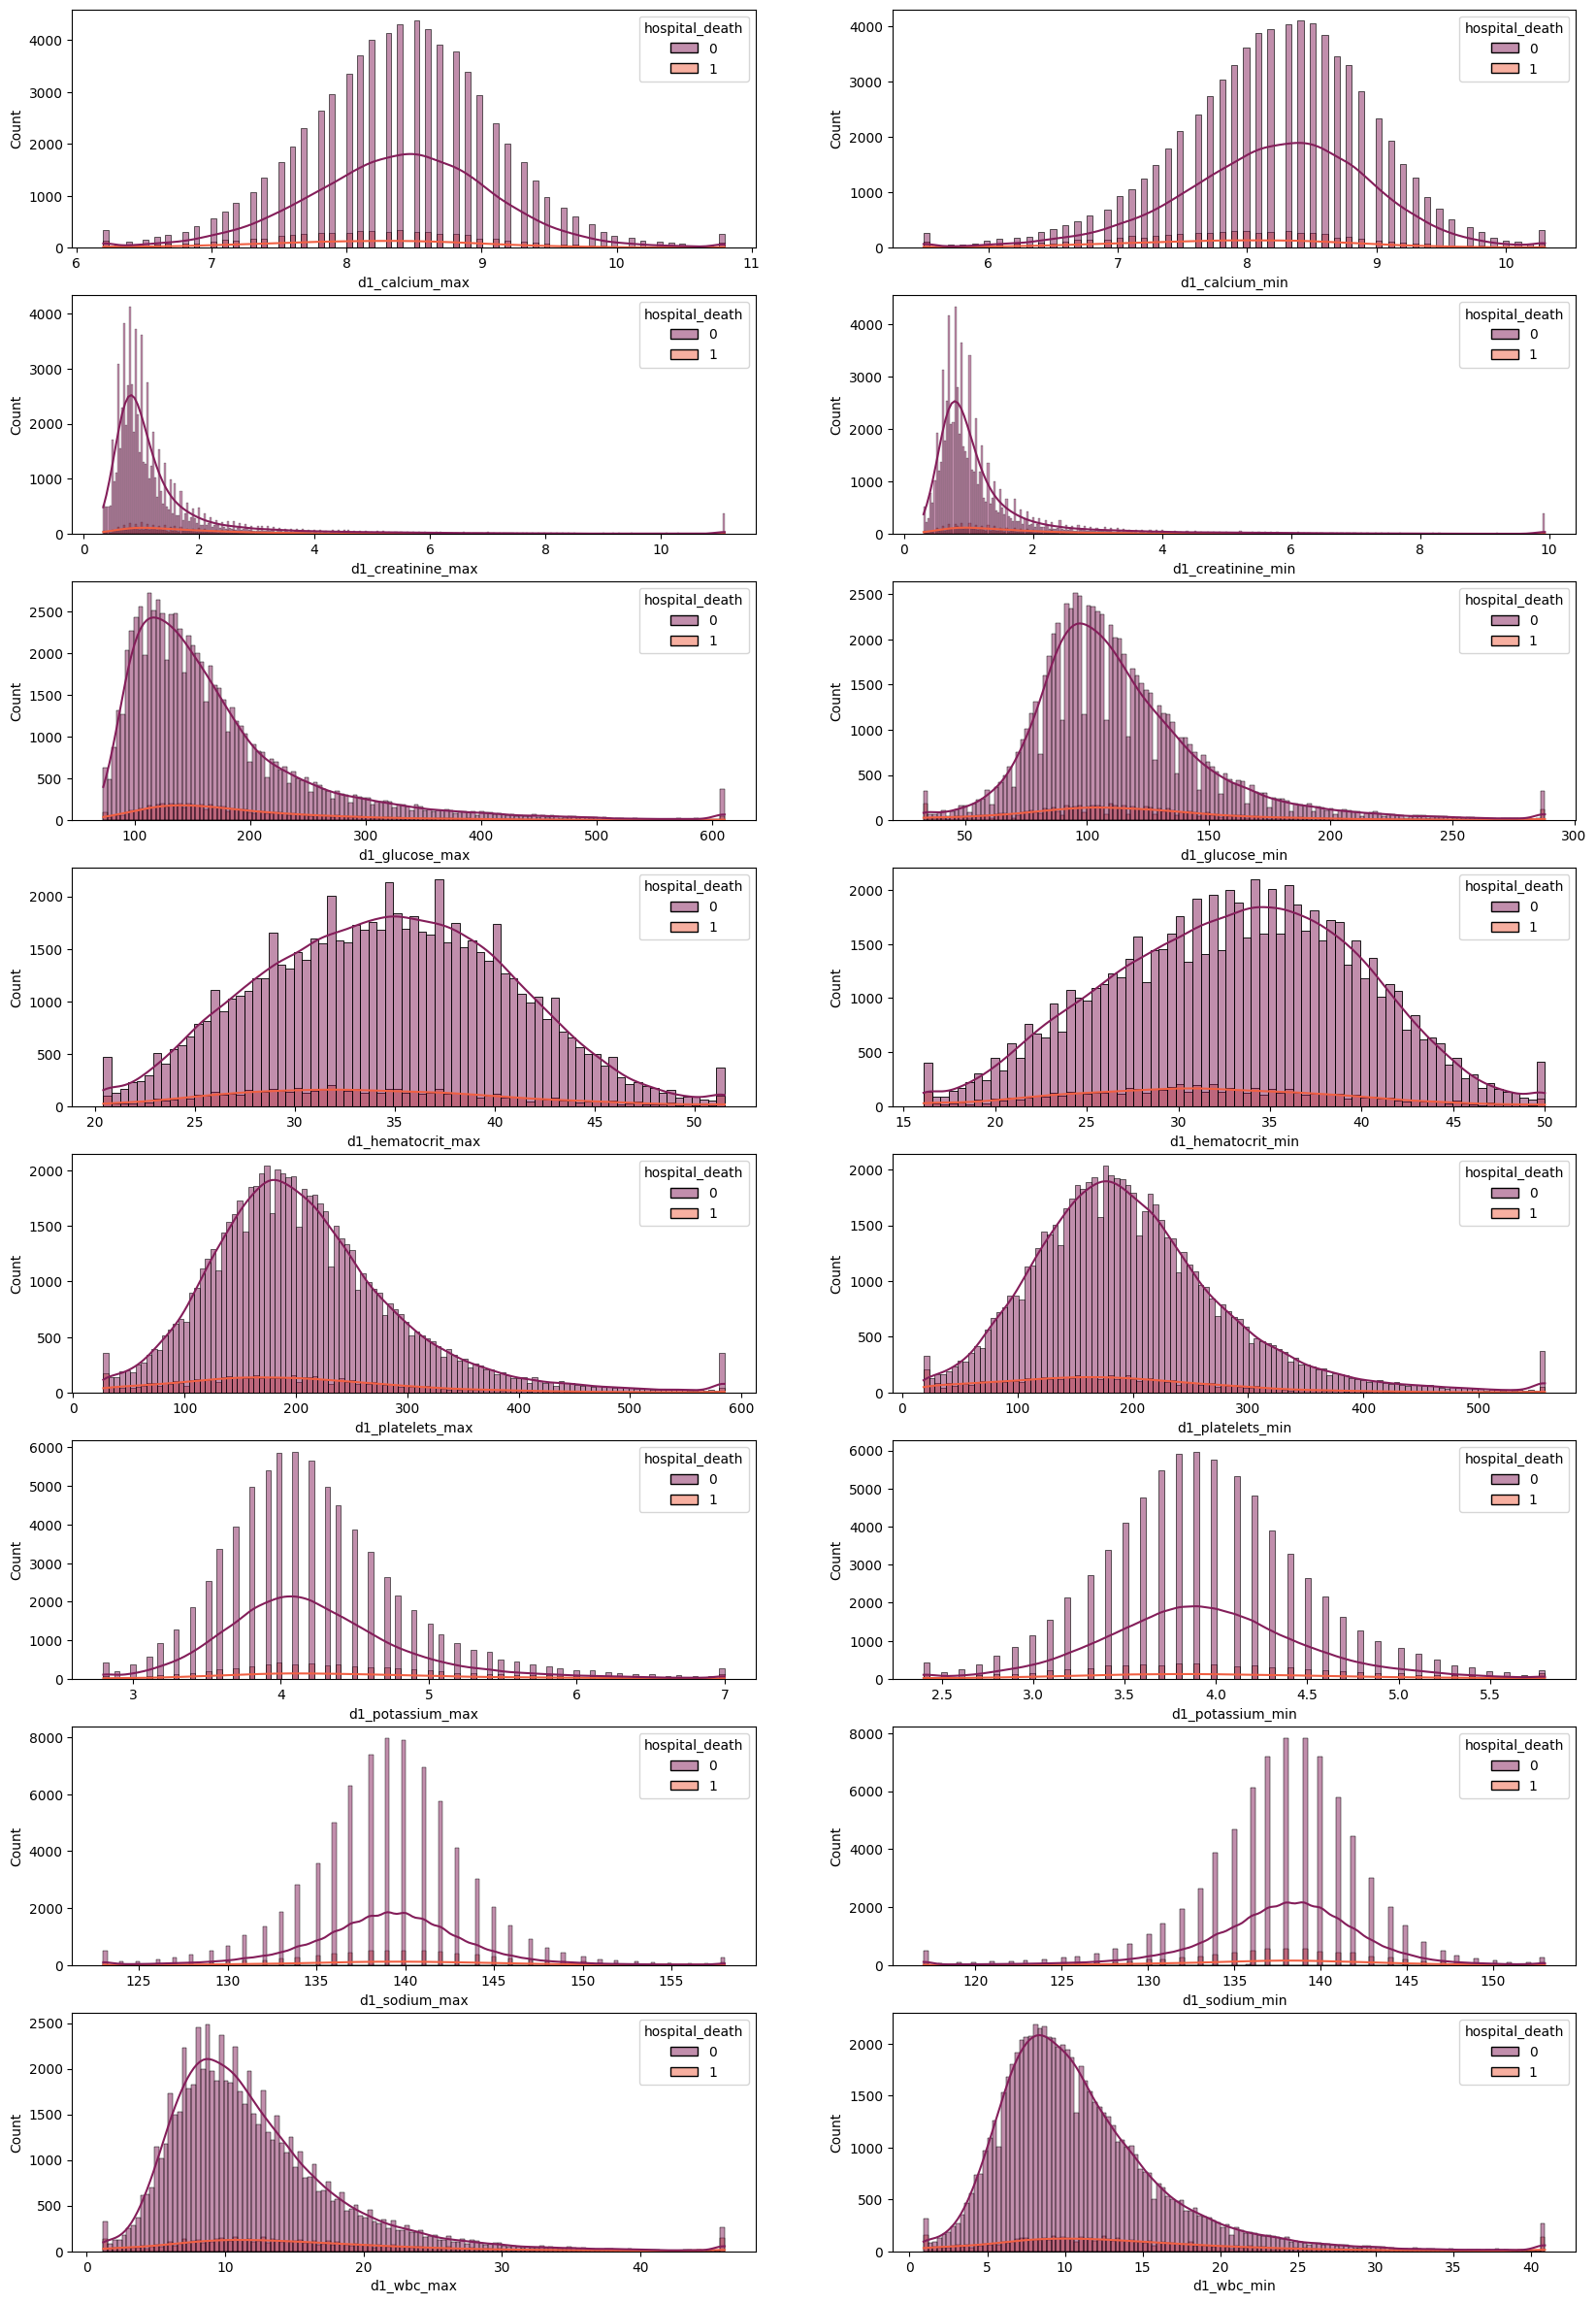

In [ ]:
# checking the difference in distribution of numerical features in two classes
# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=2, nrows=8, figsize=(20, 30))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(flabs):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 2
    y = i % 2

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(fdata, x=column, hue='hospital_death', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

**Comorbidities**

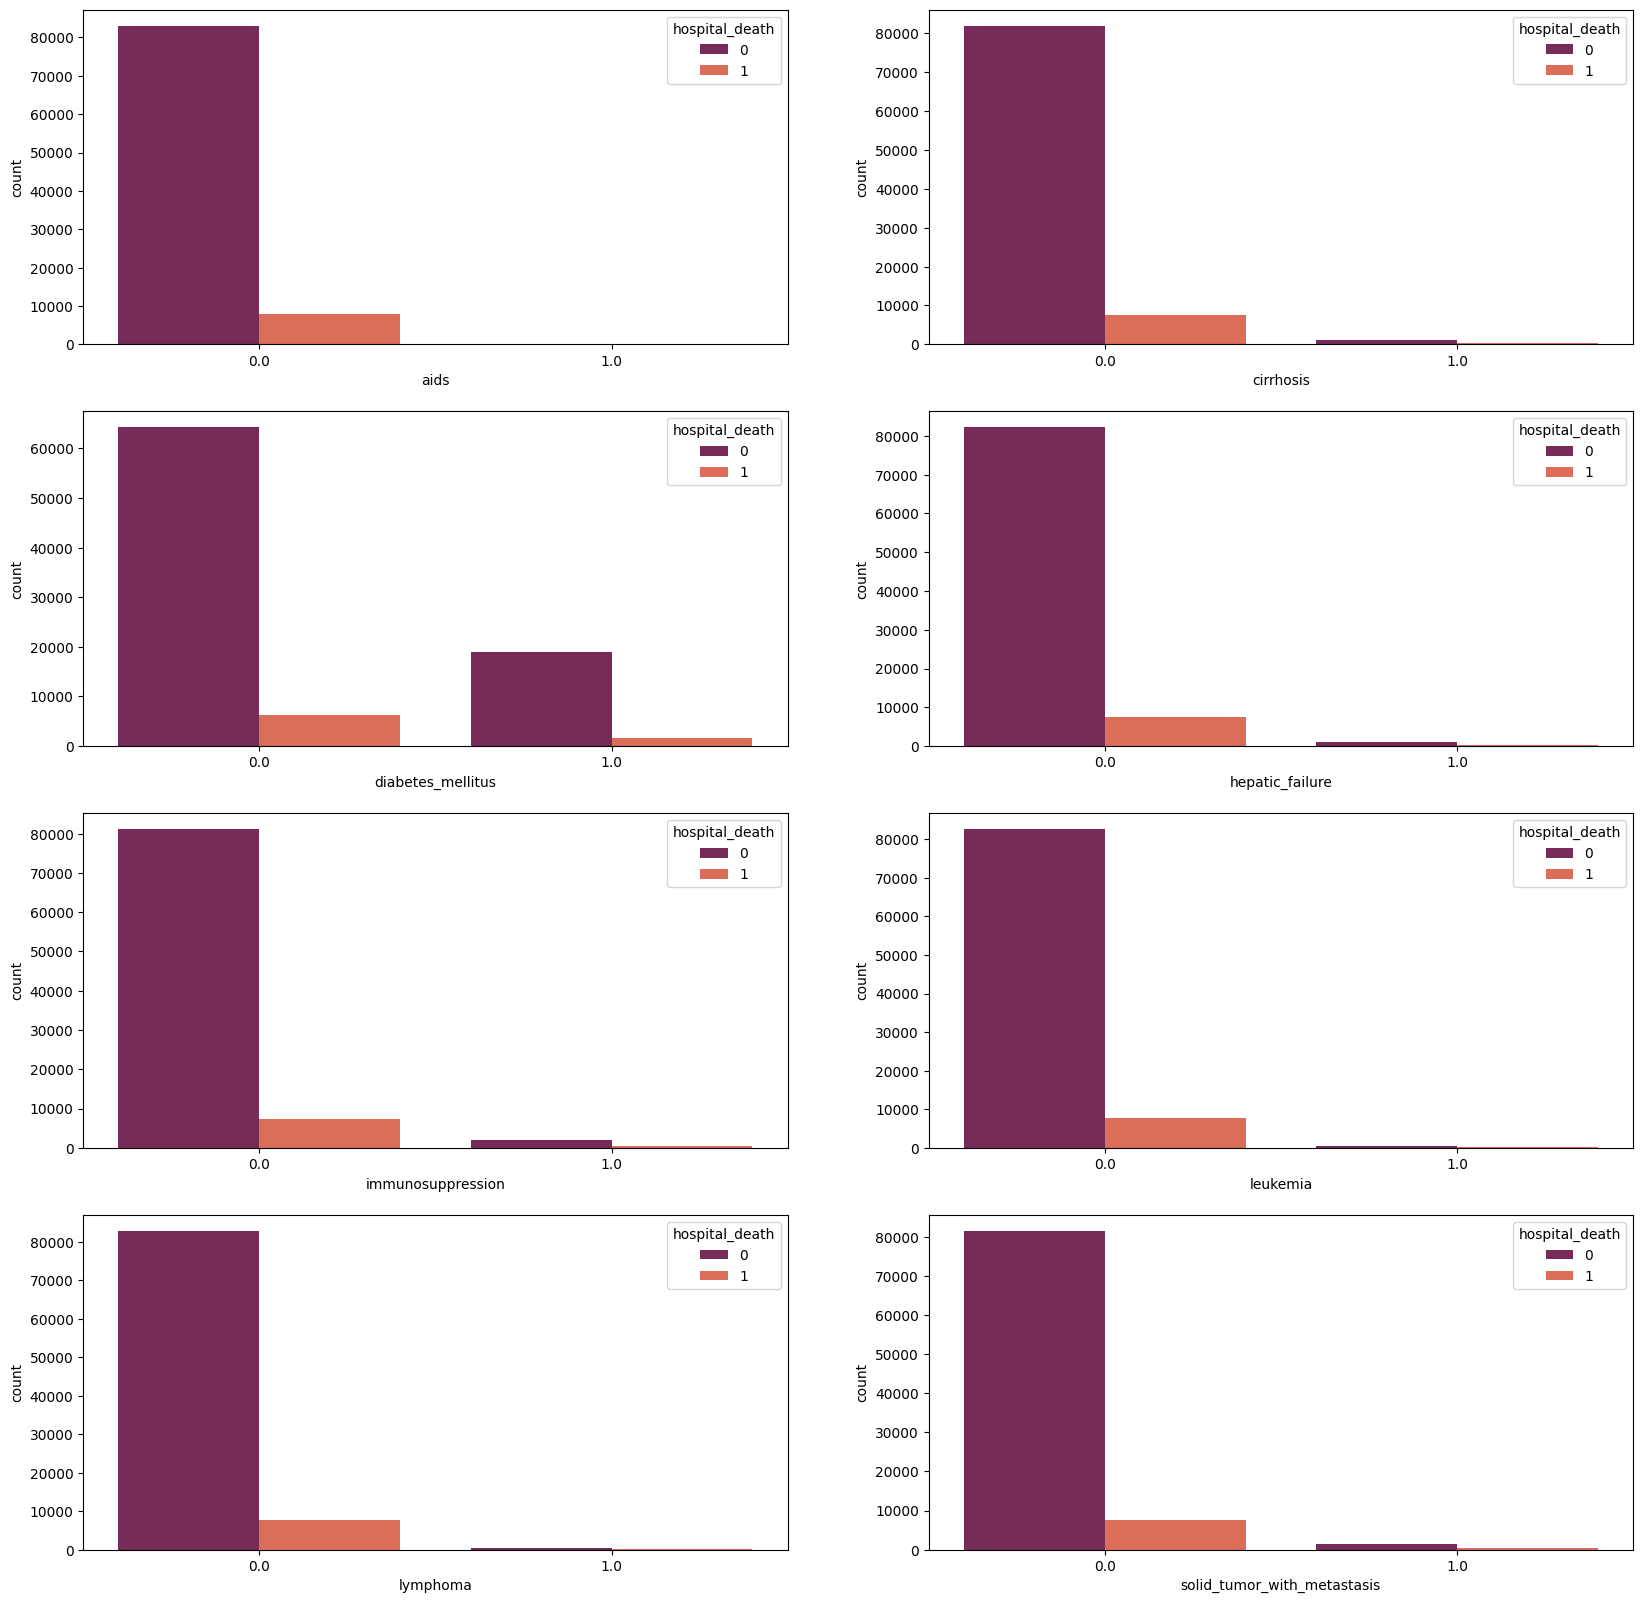

In [ ]:
#Comorbidities

# Checking the difference in the distribution of categorical features across two classes
# Initialize a 3x3 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))

# Loop through each categorical column to plot its distribution
for i, column in enumerate(fcomorbidities):
    # Determine the subplot's position based on the current index
    x = i // 2
    y = i % 2

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=fdata, x=column, hue='hospital_death', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

**Outcome**

In [ ]:
counts = fdata['hospital_death'].value_counts()

# Define your color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in "hospital_death"',
    color_discrete_sequence=colors  # apply your colors here
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='hospital_death'
    ),
    title=dict(
        text='Distribution of Classes in "hospital_death"',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

## Summary Statistics

In [ ]:
display(fdata.describe())

,hospital_death,age,bmi,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,87485.000000,88284.000000,91713.000000,89812.000000,89812.000000,90676.000000,89812.000000,90998.000000,90998.000000,91548.000000,91548.000000,91568.000000,91568.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,89389.000000,89389.000000,78644.000000,78644.000000,81544.000000,81544.000000,85906.000000,85906.000000,80059.000000,80059.000000,78269.000000,78269.000000,82128.000000,82128.000000,81518.000000,81518.000000,78539.000000,78539.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,0.086302,62.309516,29.185818,0.201106,3.465049,5.471195,0.009528,3.994778,0.151223,0.325721,88.491873,50.161314,103.000568,70.321848,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,37.284201,36.268391,8.378881,8.179575,1.488650,1.366947,174.638023,114.380940,34.531970,32.951813,207.105674,196.769779,4.251594,3.934658,139.124101,137.722144,12.476302,11.313536,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,0.280811,16.775119,8.275142,0.400829,0.951715,1.288376,0.097148,1.560166,0.358268,0.468646,19.798379,13.317586,22.017346,17.115903,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,0.693287,0.745147,0.735581,0.783588,1.506957,1.333855,86.687955,38.273013,6.238759,6.850031,89.630855,88.184269,0.667355,0.579610,4.815462,4.924065,6.796187,5.950833,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,0.000000,16.000000,14.844926,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,46.000000,13.000000,58.000000,0.000000,14.000000,0.000000,0.000000,0.000000,90.000000,41.00000,35.100000,31.889000,6.200000,5.500000,0.340000,0.300000,73.000000,33.000000,20.400000,16.100000,27.000000,18.550000,2.800000,2.400000,123.000000,117.000000,1.200000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,23.641975,0.000000,3.000000,6.000000,0.000000,4.000000,0.000000,0.000000,75.000000,42.000000,87.000000,60.000000,22.000000,10.000000,99.000000,89.000000,130.000000,83.00000,36.900000,36.100000,7.900000,7.700000,0.760000,0.710000,117.000000,91.000000,30.000000,28.000000,148.000000,138.000000,3.800000,3.600000,137.000000,135.000000,8.000000,7.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,27.654655,0.000000,4.000000,6.000000,0.000000,5.000000,0.000000,0.000000,86.000000,50.000000,101.000000,69.000000,26.000000,13.000000,100.000000,92.000000,146.000000,96.00000,37.110000,36.400000,8.400000,8.200000,1.000000,0.950000,150.000000,107.000000,34.500000,33.200000,196.000000,187.000000,4.200000,3.900000,139.000000,138.000000,11.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.930206,0.000000,4.000000,6.000000,0.000000,5.000000,0.000000,1.000000,99.000000,58.000000,116.000000,81.000000,32.000000,16.000000,100.000000,95.000000,164.000000,110.00000,37.600000,36.660000,8.800000,8.700000,1.500000,1.400000,201.000000,131.000000,39.000000,38.000000,251.000000,242.000000,4.600000,4.300000,142.000000,141.000000,15.200000,13.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,1.000000,4.000000,6.

# Data Engineering

In [ ]:
# Combind the gcs scores
fdata['total_gcs'] = fdata[['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']].sum(axis=1, skipna = False)
fdata.loc[fdata['gcs_unable_apache'] == 1.0, 'total_gcs'] = 3

# Drop the gcs scores and gcs_unable from the data
fdata = fdata.drop(['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'gcs_unable_apache'], axis = 1, inplace = False)

fAPACHE_cov = ['apache_post_operative', 'total_gcs', 'intubated_apache', 'ventilated_apache']

## Update Categorical Columns

In [ ]:
fdata['gender'].replace({'F' : 1, 'M' : 0}, inplace=True)

In [ ]:
fdata['ethnicity'].replace({'Caucasian':1, 'Hispanic':0,'African American':0, 'Asian':0, 'Native American':0, 'Other/Unknown':0}, inplace=True)

In [ ]:
fdata.head()

,hospital_death,age,bmi,ethnicity,gender,apache_post_operative,intubated_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,total_gcs
0,0,68.0,22.73,1.0,0.0,0,0.0,0.0,68.0,37.0,119.0,72.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,8.5,7.4,2.51,2.23,168.0,109.0,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0
1,0,77.0,27.42,1.0,1.0,0,0.0,1.0,95.0,31.0,118.0,72.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,8.6,8.0,0.71,0.56,145.0,128.0,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0,25.0,31.95,1.0,1.0,0,0.0,0.0,88.0,48.0,96.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,37.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
3,0,81.0,22.64,1.0,1.0,1,1.0,1.0,48.0,42.0,116.0,92.0,23.0,7.0,100.0,95.0,158.0,84.0,38.0,34.8,NaN,NaN,NaN,NaN,185.0,88.0,34.0,25.9,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
4,0,19.0,NaN,1.0,0.0,0,0.0,0.0,99.0,57.0,89.0,60.0,18.0,16.0,100.0,96.0,147.0,120.0,37.2,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Features by Category Types

In [ ]:
numeric_colums =  ['age', 'bmi', 'total_gcs', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min']
target_column = 'hospital_death'
categorical_columns = ['ethnicity','gender', 'apache_post_operative', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

# Model Evaluation

## Necessary Functions

In [ ]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=42)

In [ ]:
# Define a function to preprocess and transform input data
def fit_transform(input_df):
    # Initialize transformers and imputers
    imputer = IterativeImputer(max_iter=10, random_state=42)
    st_x = StandardScaler()

    # Create a copy of the input DataFrame to avoid modifying the original data
    df = input_df.copy()

    # Perform imputation and standardization on the feature matrix
    X = imputer.fit_transform(df.drop('hospital_death', axis=1).to_numpy())
    X = st_x.fit_transform(X)

    # Extract the target variable 'hospital_death'
    Y = df['hospital_death'].to_numpy()

    # Return the preprocessed feature matrix, target variable, and transformers/imputers
    return X, Y, imputer, st_x

In [ ]:
def transform(input_df, imputer, st_x):
    # Create a copy of the input DataFrame to avoid modifying the original data
    df = input_df.copy()

    # Perform imputation and standardization on the feature matrix
    X = imputer.transform(df.drop('hospital_death', axis=1).to_numpy())
    X = st_x.transform(X)

    # Return the transformed feature matrix
    return X

## Set Up

In [ ]:
# Splitting the data into training and testing sets
train = fdata.sample(frac=0.7, random_state=42)
test = fdata.drop(train.index)

## Random Forest

In [ ]:
X_train = train.drop('hospital_death', axis = 1, inplace = False)
X_test = test.drop('hospital_death', axis = 1, inplace = False)

Y_train = train['hospital_death']
Y_test = test['hospital_death']

In [ ]:
# Splitting the data into training and testing sets
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

# Set up model pipeline for each model
pipelines =[]

# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
random_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)


# Creating a pipeline which first applies the column transformer preprocessing, then fits the Random Forest model
#random forest
pipelines.append(('model_randomforest', Pipeline([
    ('imputation', IterativeImputer(max_iter=10, random_state=42)),
    ('random_forest', random_forest)
])))

# Display the pipeline architecture
# Cross validation with k-folds=5
model_name=[]
results=[]

for pipe, model in pipelines:
  # Cross-Validation setup using K-Fold with 5 folds
  cv = KFold(n_splits=5, shuffle=True, random_state=42)
  cv_results = cross_validate(model, X_train, Y_train, cv=cv) # default scoring is accuracy
  results.append(cv_results)
  model_name.append(pipe)
  # Print mean CV score
  mean_cv_test_score = "Mean test score %s: %f (%f)" % (model_name, np.mean(cv_results['test_score'])*100, np.std(cv_results['test_score'])*100)
  print(mean_cv_test_score)


Mean test score ['model_randomforest']: 92.242861 (0.316593)


In [ ]:
model

Pipeline(steps=[('imputation', IterativeImputer(random_state=42)),
                ('random_forest',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', oob_score=True))])

In [ ]:
# Using the pipeline model to train on the training data.
# Dropping the target column ('hospital_death') from the input features.
model = model.fit(X_train, Y_train)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred_train = model.predict(X_train)
accuracy_score(Y_train, Y_pred_train)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred_test = model.predict(X_test)
accuracy_score(Y_test, Y_pred_test)

0.9246928836228829

In [ ]:
# Setting hyperparameters for Random Forest for the Grid Search.
param_dist = {
    "random_forest__n_estimators" : [200],
    "random_forest__max_depth" : [5, 10, 15],
    "random_forest__min_samples_leaf" : [15, 20 ,25],
    "random_forest__max_features" : ['sqrt']
}

# Initializing stratified K-fold cross-validation. This ensures each fold has the same proportion of target labels as the whole dataset.
skf = StratifiedKFold(n_splits=5)

# Setting up GridSearchCV to search through the parameter space.
# It will evaluate the model for each combination of hyperparameters provided using stratified K-fold cross-validation.
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Running the GridSearchCV on the training data.
random_search.fit(X_train, Y_train)

# Extracting the results of the Grid Search into a DataFrame for analysis.
results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,93.868443,1.36945,0.532891,0.023582,15,sqrt,15,200,"{'random_forest__max_depth': 15, 'random_fores...",0.888084,0.892679,0.892056,0.894704,0.887374,0.89098,0.002804,1


In [ ]:
# Updating the model's hyperparameters with the best parameters identified from the Grid Search.
model = model.set_params(**random_search.best_params_)

# Retraining the model with the updated hyperparameters on the training data.
Final_RFmodel = model.fit(X_train, Y_train)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred_train = Final_RFmodel.predict(X_train)
accuracy_score(Y_train,Y_pred_train)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred_test = Final_RFmodel.predict(X_test)
accuracy_score(Y_test,Y_pred_test)

0.8937631751108527

======== Training Set ==========
AUC :  0.773453709845107
Accuracy :  0.9293446938425832
Confusion Matrix:
[[54698   599]
 [ 3937  4965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     55297
           1       0.89      0.56      0.69      8902

    accuracy                           0.93     64199
   macro avg       0.91      0.77      0.82     64199
weighted avg       0.93      0.93      0.92     64199



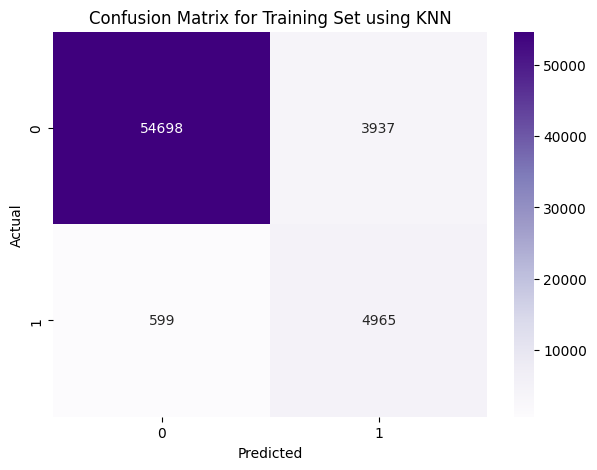

======== Test Set ==========
AUC :  0.6894714506228686
Accuracy :  0.8937631751108527
Confusion Matrix:
[[23155   915]
 [ 2008  1436]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     24070
           1       0.61      0.42      0.50      3444

    accuracy                           0.89     27514
   macro avg       0.77      0.69      0.72     27514
weighted avg       0.88      0.89      0.88     27514



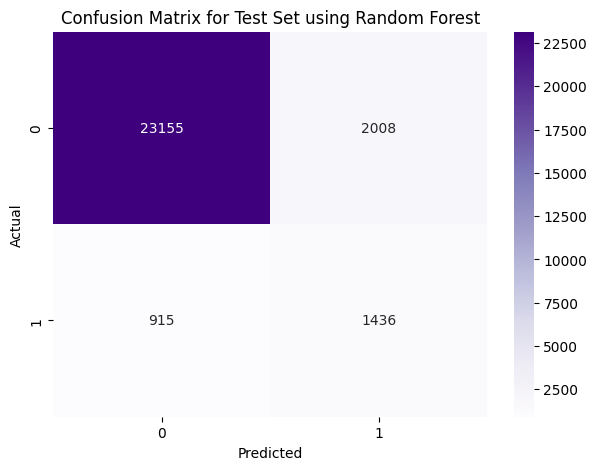

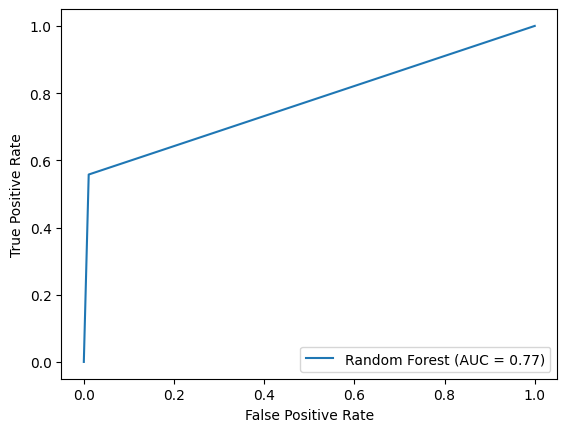

In [ ]:
# Evaluation metrics and scores for testing and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(Y_pred_test, Y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(Y_pred_train, Y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Get unique classes
classes = fdata['hospital_death'].unique()

# Plotting the confusion matrix for training set
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_train, Y_pred_train, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Set using KNN')
plt.show()


# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plotting the confusion matrix for test set
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred_test, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set using Random Forest')
plt.show()

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(Y_pred_train, Y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()

## Logistic Regression

======== Training Set ==========
AUC :  0.7918220825144962
Accuracy :  0.92258446393246
Confusion Matrix:
[[57959  4294]
 [  676  1270]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     62253
           1       0.23      0.65      0.34      1946

    accuracy                           0.92     64199
   macro avg       0.61      0.79      0.65     64199
weighted avg       0.97      0.92      0.94     64199

======== Test Set ==========
AUC :  0.7997613156381994
Accuracy :  0.9247292287562695
Confusion Matrix:
[[24883  1791]
 [  280   560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     26674
           1       0.24      0.67      0.35       840

    accuracy                           0.92     27514
   macro avg       0.61      0.80      0.66     27514
weighted avg       0.97      0.92      0.94     27514



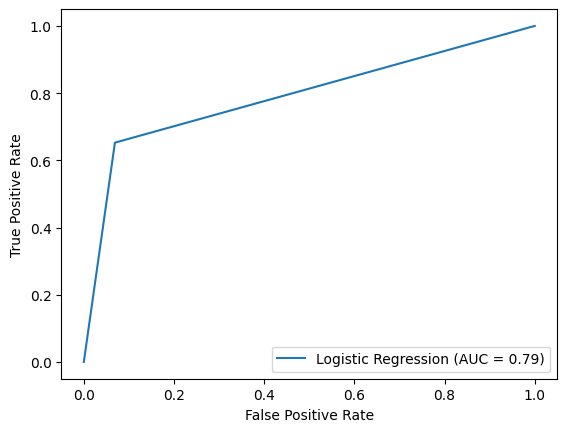

In [ ]:
# Preprocess and transform the training and test sets using the fit_transform and transform functions
X_train, Y_train, imputer, st_x = fit_transform(train)
X_test = transform(test, imputer, st_x)
Y_test = test['hospital_death'].to_numpy()

# Select all features
X_train = X_train
X_test = X_test

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, Y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)


# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)


# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, Y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

# Feature Assoications

In [ ]:
#'fdata' is actual dataset

df = fdata.copy()

#Impute ethnicity with mode using simple imputer
from sklearn.impute import SimpleImputer

# Extract the 'ethnicity' column
ethnicity_values = df['ethnicity']

# Instantiate SimpleImputer with strategy='most_frequent' to impute the mode
imputer = SimpleImputer(strategy='most_frequent')

# Reshape the 'ethnicity' column for the imputer
ethnicity_values = ethnicity_values.values.reshape(-1, 1)

# Impute the mode for 'ethnicity'
df['ethnicity'] = imputer.fit_transform(ethnicity_values)

# Print the resulting DataFrame
print(df.head())

   hospital_death   age    bmi  ethnicity  gender  apache_post_operative  \
0               0  68.0  22.73        1.0     0.0                      0   
1               0  77.0  27.42        1.0     1.0                      0   
2               0  25.0  31.95        1.0     1.0                      0   
3               0  81.0  22.64        1.0     1.0                      1   
4               0  19.0    NaN        1.0     0.0                      0   

   intubated_apache  ventilated_apache  d1_diasbp_max  d1_diasbp_min  \
0               0.0                0.0           68.0           37.0   
1               0.0                1.0           95.0           31.0   
2               0.0                0.0           88.0           48.0   
3               1.0                1.0           48.0           42.0   
4               0.0                0.0           99.0           57.0   

   d1_heartrate_max  d1_heartrate_min  d1_resprate_max  d1_resprate_min  \
0             119.0              72

In [ ]:
#impute the other variables
# Extract the target variable 'hospital_death'
Y = df['hospital_death'].to_numpy()

# Perform imputation on the feature matrix
X = df.drop('hospital_death', axis=1)
imputer = IterativeImputer(max_iter=10, random_state=42)
X_imputed = imputer.fit_transform(X)

# Recombine the imputed features with the target variable
imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
imputed_df['hospital_death'] = Y

# Print the imputed DataFrame
print(imputed_df.head())

#Create binary caucasian variable
imputed_df['Caucasian'] = (imputed_df['ethnicity'] == 0).astype(int)
print(imputed_df[['ethnicity', 'Caucasian']])

#drop other ethnicity variable
imputed_df = imputed_df.drop('ethnicity', axis=1)

# Print the new imputed DataFrame
print(imputed_df.head())

    age        bmi  ethnicity  gender  apache_post_operative  \
0  68.0  22.730000        1.0     0.0                    0.0   
1  77.0  27.420000        1.0     1.0                    0.0   
2  25.0  31.950000        1.0     1.0                    0.0   
3  81.0  22.640000        1.0     1.0                    1.0   
4  19.0  30.889074        1.0     0.0                    0.0   

   intubated_apache  ventilated_apache  d1_diasbp_max  d1_diasbp_min  \
0               0.0                0.0           68.0           37.0   
1               0.0                1.0           95.0           31.0   
2               0.0                0.0           88.0           48.0   
3               1.0                1.0           48.0           42.0   
4               0.0                0.0           99.0           57.0   

   d1_heartrate_max  d1_heartrate_min  d1_resprate_max  d1_resprate_min  \
0             119.0              72.0             34.0             10.0   
1             118.0             

In [ ]:
# Create and fit logistic regression model with imputed data

# Define the dependent variable 'y' and independent variables 'X'
y = imputed_df['hospital_death']
X = imputed_df.drop(['hospital_death'], axis=1)

# Add a constant term to the feature variables
X = sm.add_constant(X)

# Fit logistic regression model
log_reg1 = sm.Logit(y, X).fit()

# Coefficients and their standard errors
coefficients = log_reg1.params
standard_errors = log_reg1.bse

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Calculate 95% CI for odds ratios
lower_bound = np.exp(coefficients - 1.96 * standard_errors)
upper_bound = np.exp(coefficients + 1.96 * standard_errors)

# Print results
for idx, coef in enumerate(X.columns):
    print(f"For {coef}: Odds Ratio: {odds_ratios[idx]:.2f}, 95% CI: ({lower_bound[idx]:.2f}, {upper_bound[idx]:.2f})")

Optimization terminated successfully.
         Current function value: 0.211902
         Iterations 8
For const: Odds Ratio: 16202245.25, 95% CI: (2039554.27, 128710843.57)
For age: Odds Ratio: 1.03, 95% CI: (1.03, 1.03)
For bmi: Odds Ratio: 0.99, 95% CI: (0.99, 1.00)
For gender: Odds Ratio: 0.99, 95% CI: (0.94, 1.05)
For apache_post_operative: Odds Ratio: 0.31, 95% CI: (0.28, 0.34)
For intubated_apache: Odds Ratio: 1.09, 95% CI: (1.01, 1.17)
For ventilated_apache: Odds Ratio: 2.24, 95% CI: (2.09, 2.41)
For d1_diasbp_max: Odds Ratio: 1.00, 95% CI: (1.00, 1.00)
For d1_diasbp_min: Odds Ratio: 0.99, 95% CI: (0.98, 0.99)
For d1_heartrate_max: Odds Ratio: 1.01, 95% CI: (1.01, 1.02)
For d1_heartrate_min: Odds Ratio: 1.00, 95% CI: (1.00, 1.00)
For d1_resprate_max: Odds Ratio: 1.01, 95% CI: (1.01, 1.01)
For d1_resprate_min: Odds Ratio: 1.03, 95% CI: (1.03, 1.04)
For d1_spo2_max: Odds Ratio: 0.96, 95% CI: (0.94, 0.97)
For d1_spo2_min: Odds Ratio: 0.98, 95% CI: (0.98, 0.98)
For d1_sysbp_max: Odd

In [ ]:
# calculate specific OR for age difference of 10 years
odds_ratios = np.exp(10 * coefficients['age'])  # Adjust for a 10-year difference

# Calculate 95% CI for odds ratios
lower_bound = np.exp(10 * (coefficients['age'] - 1.96 * standard_errors['age']))
upper_bound = np.exp(10 * (coefficients['age'] + 1.96 * standard_errors['age']))
print(f"For a 10-year difference in age: Odds Ratio: {odds_ratios:.2f}, 95% CI: ({lower_bound:.2f}, {upper_bound:.2f})")

For a 10-year difference in age: Odds Ratio: 1.37, 95% CI: (1.34, 1.39)


In [ ]:
# Get summary report
summary = log_reg1.summary()
print(summary)

                           Logit Regression Results                           
Dep. Variable:         hospital_death   No. Observations:                91713
Model:                          Logit   Df Residuals:                    91668
Method:                           MLE   Df Model:                           44
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.2790
Time:                        01:42:10   Log-Likelihood:                -19434.
converged:                       True   LL-Null:                       -26954.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          16.6007      1.057     15.700      0.000      14.528      18.673
age                             0.0312      0.001     30.015      0.000       0.